In [1]:
import numpy as np
import pandas as pd
import subprocess
from matplotlib import pyplot as plt

In [105]:
label = 'wave';
pids_str = subprocess.check_output(['find',f'/data/apc/cold_R0/{label}','-name','*.log']).decode('utf-8');
pids = [int(p.split('/')[-1].split('.')[0]) for p in pids_str.split()]

In [106]:
df = pd.DataFrame();

In [107]:
for pid in pids:
    cur = pd.read_csv(f'/data/apc/cold_R0/{label}/{pid}.log',header=None);
    cur[26] = pid;
    df = pd.concat([df, cur], ignore_index=True);

In [108]:
df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.289244,0.161142,0.149131,0.071763,0.930245,0.304370,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,335,969,12115,2789,True,4178375
1,0.289244,0.161142,0.149131,0.071763,0.930245,0.304370,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,-0.024814,339,971,12142,2791,True,4178375
2,0.289244,0.161142,0.149131,0.071763,0.930245,0.304370,0.000000,0.030677,0.000000,0.000000,...,0.000000,0.000000,0.00000,-0.024814,340,977,12124,2788,False,4178375
3,0.289244,0.161142,0.149131,0.071763,0.930245,0.304370,0.000000,0.000000,0.000000,-0.027134,...,0.000000,0.000000,0.00000,-0.024814,340,974,12105,2807,True,4178375
4,0.289244,0.161142,0.149131,0.071763,0.930245,0.304370,-0.010700,0.000000,0.000000,-0.027134,...,0.000000,0.000000,0.00000,-0.024814,335,970,12071,2805,False,4178375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17649,0.931220,0.640973,0.968475,0.248219,0.794108,0.313902,0.317744,-0.160641,0.389601,-0.199849,...,-0.287887,0.300662,0.54932,0.252454,393,807,11207,2433,True,3837495
17650,0.931220,0.640973,0.968475,0.248219,0.794108,0.313902,0.317744,-0.160641,0.389601,-0.199849,...,-0.287887,0.300662,0.54932,0.252454,393,806,11257,2439,True,3837495
17651,0.931220,0.640973,0.968475,0.248219,0.794108,0.313902,0.317744,-0.160641,0.389601,-0.199849,...,-0.302533,0.300662,0.54932,0.252454,392,805,11209,2426,True,3837495
17652,0.931220,0.640973,0.968475,0.248219,0.794108,0.313902,0.317744,-0.160641,0.389601,-0.199849,...,-0.302533,0.300662,0.54932,0.252454,390,807,11222,2427,False,3837495


In [109]:
#row = 21778
#print(f'offset={list(df.iloc[row][0:6])};')
#print(f'angles={list(df.iloc[row][6:21])};')

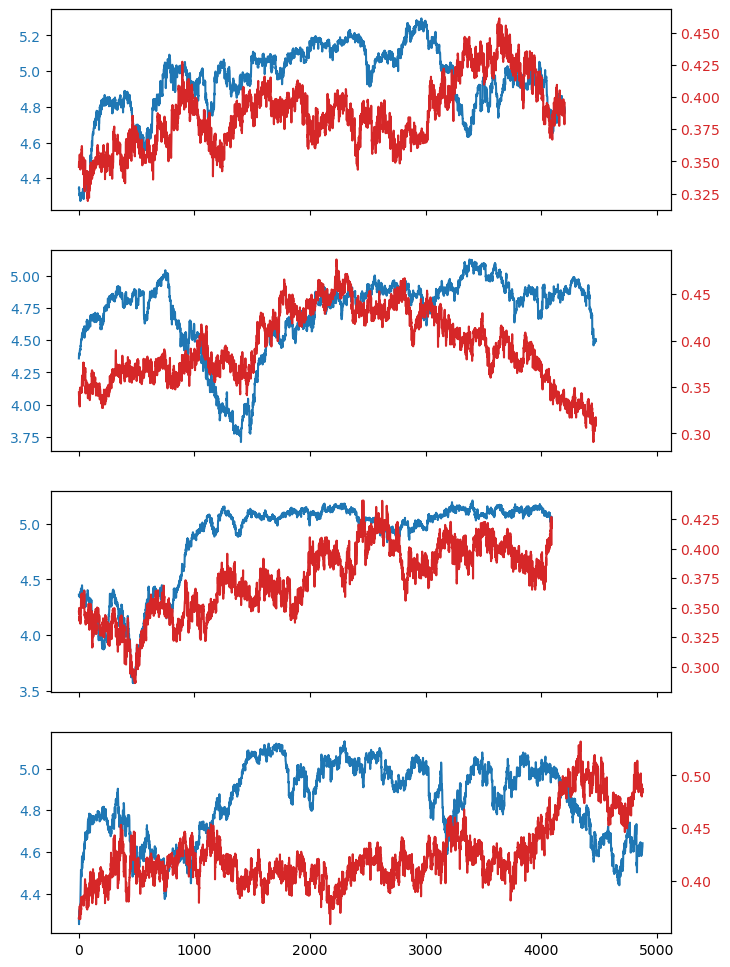

In [110]:
fig,axes = plt.subplots(len(pids),1,figsize=(8,12),sharex=True)
for i,pid in enumerate(pids):
    dg = df[df[26] == pid];
    ax1 = axes[i];
    #ax1.set_xlim((550,650));
    ax2 = ax1.twinx();
    ax1.plot(list(dg[23]/dg[24]),'C0');
    ax1.tick_params(axis='y', labelcolor='C0');
    ax2.plot(list(dg[21]/dg[22]),'C3');
    ax2.tick_params(axis='y', labelcolor='C3');

In [88]:
df[df[26] == pids[0]].iloc[620:625]

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
620,0.687333,0.398217,0.3376,0.883661,0.722897,0.00266,0.087318,-0.039684,-0.189627,-0.152508,...,0.205323,0.041425,0.06195,-0.108479,203,771,7226,2350,False,10637
621,0.687333,0.398217,0.3376,0.883661,0.722897,0.00266,0.087318,-0.039684,-0.208858,-0.152508,...,0.205323,0.041188,0.06195,-0.108479,202,765,7027,2338,True,10637
622,0.687333,0.398217,0.3376,0.883661,0.722897,0.00266,0.087318,-0.039684,-0.208858,-0.152508,...,0.201730,0.041188,0.06195,-0.108479,203,767,7016,2337,False,10637
623,0.687333,0.398217,0.3376,0.883661,0.722897,0.00266,0.087318,-0.039684,-0.208858,-0.152508,...,0.205323,0.041188,0.06195,-0.108479,202,773,7137,2329,True,10637
624,0.687333,0.398217,0.3376,0.883661,0.722897,0.00266,0.087318,-0.039684,-0.208858,-0.152508,...,0.205323,0.041188,0.06195,-0.111915,202,772,7115,2324,True,10637


In [89]:
df[27] = 2*df[21]/df[22]+df[23]/df[24]

In [90]:
df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.687333,0.398217,0.337600,0.883661,0.722897,0.002660,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,337,885,12871,2666,True,10637,5.589414
1,0.687333,0.398217,0.337600,0.883661,0.722897,0.002660,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,325,881,12798,2663,True,10637,5.543656
2,0.687333,0.398217,0.337600,0.883661,0.722897,0.002660,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.010299,0.000000,325,880,12795,2659,True,10637,5.550596
3,0.687333,0.398217,0.337600,0.883661,0.722897,0.002660,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.010299,0.000000,329,882,12613,2660,True,10637,5.487761
4,0.687333,0.398217,0.337600,0.883661,0.722897,0.002660,0.027862,0.000000,0.000000,0.000000,...,0.000000,-0.010299,0.000000,328,879,12679,2662,True,10637,5.509263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7150,0.461514,0.819272,0.873683,0.656001,0.383228,0.962437,-0.349739,0.139276,0.350995,0.188777,...,-0.143786,0.008944,-0.093707,386,950,15922,2686,False,614079,6.740405
7151,0.461514,0.819272,0.873683,0.656001,0.383228,0.962437,-0.349739,0.139276,0.350995,0.188777,...,-0.143786,0.008944,-0.093707,399,959,16148,2711,True,614079,6.788590
7152,0.461514,0.819272,0.873683,0.656001,0.383228,0.962437,-0.349739,0.139276,0.350995,0.188777,...,-0.143786,0.008944,-0.105944,398,961,16107,2702,True,614079,6.789444
7153,0.461514,0.819272,0.873683,0.656001,0.383228,0.962437,-0.349739,0.139276,0.350995,0.188777,...,-0.143786,0.008944,-0.105944,398,959,16117,2702,True,614079,6.794872


In [ ]:
# TODO: verify MC transition probability
jump_probs
for row in df.iterrows():
    print(row[1]);